<a href="https://colab.research.google.com/github/Aabhiinavvv/Abhinav/blob/main/customer_segmentation_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [3]:
customer_data = pd.read_csv("/content/customerdatakmean.zip")

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


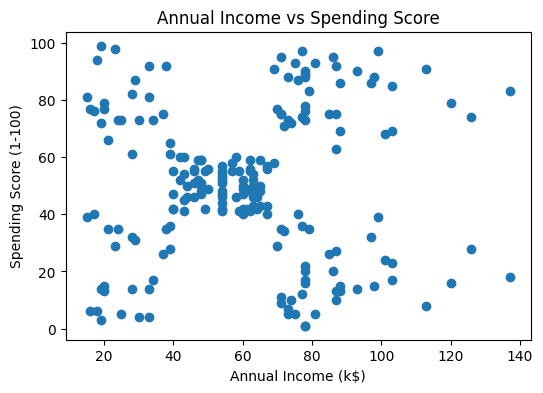

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(customer_data['Annual Income (k$)'],customer_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

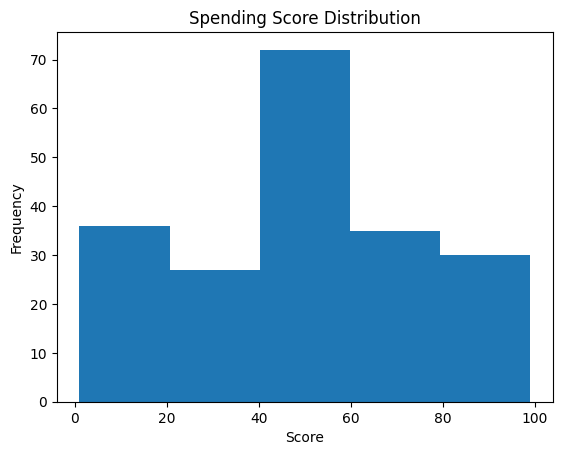

In [15]:
customer_data["Spending Score (1-100)"].plot(kind="hist", bins=5)
plt.title("Spending Score Distribution")
plt.xlabel("Score")
plt.style.use('ggplot')

plt.show()


In [16]:
X = customer_data.iloc[:,[3,4]].values

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)


[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


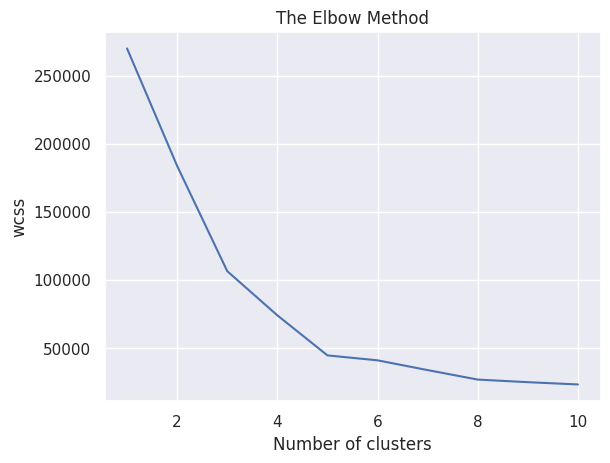

In [23]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 5, init='k-means++',random_state =0)
Y = kmeans.fit_predict(X)
print (Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


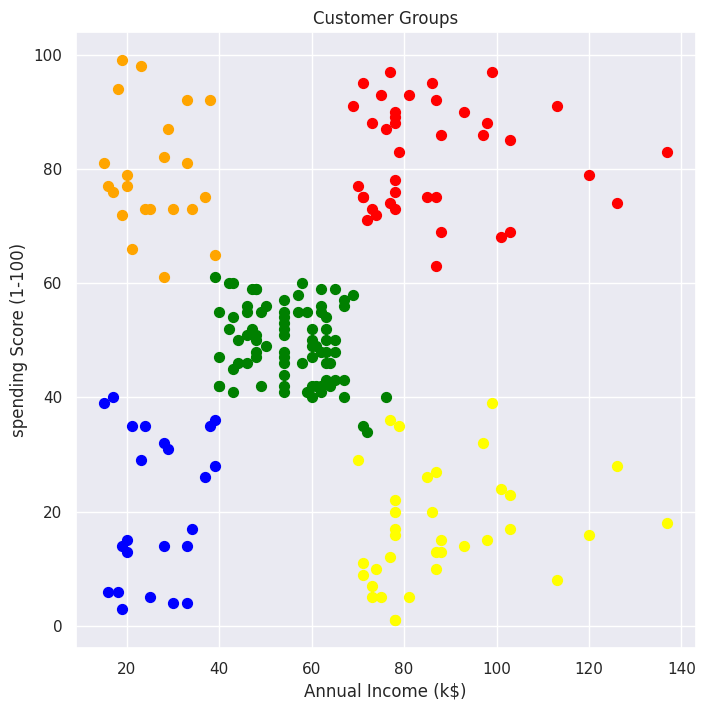

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green",label='Cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="red",label='Cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="yellow",label='Cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="blue",label='Cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="orange",label='Cluster5')

plt.title("Customer Groups")
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending Score (1-100)')
plt.show()

Dataset Loaded:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Clusters Assigned:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4



Synthetic Churn Labels Added:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Churn
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,0



---------------- RESULTS ----------------

📌 Accuracy: 0.725

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.67      0.62      0.65        16

    accuracy                           0.72        40
   macro avg       0.71      0.71      0.71        40
weighted avg       0.72      0.72      0.72        40


📌 ROC-AUC Score: 0.80078125


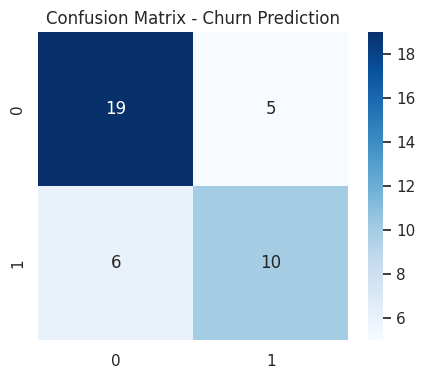


Feature Importance:


,Feature,Importance
2,Spending Score (1-100),0.351033
1,Annual Income (k$),0.322885
0,Age,0.259181
3,Cluster,0.066901


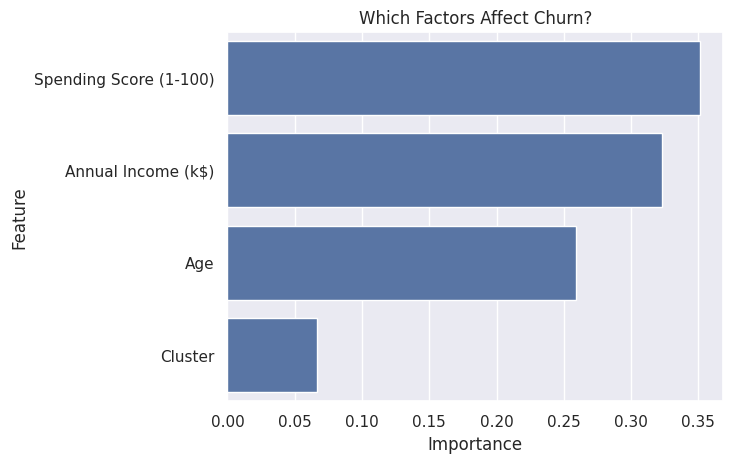

In [30]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


df = pd.read_csv("/content/customerdatakmean.zip")

print("Dataset Loaded:")
display(df.head())


X = df.iloc[:, [3, 4]].values

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X)

df["Cluster"] = clusters

print("\nClusters Assigned:")
display(df.head())


np.random.seed(42)

df["Churn"] = df.apply(
    lambda row: np.random.choice(
        [0, 1],
        p=[0.85, 0.15] if row["Cluster"] in [1, 2]
        else ([0.65, 0.35] if row["Cluster"] == 4 else [0.40, 0.60])
    ),
    axis=1
)

print("\nSynthetic Churn Labels Added:")
display(df.head())


features = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Cluster"]
X_model = df[features]
y_model = df["Churn"]


X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42, stratify=y_model
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight="balanced"
)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\n---------------- RESULTS ----------------")
print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📌 ROC-AUC Score:", roc_auc_score(y_test, y_proba))


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Churn Prediction")
plt.show()


feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
display(feature_importance)

sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Which Factors Affect Churn?")
plt.show()


In [33]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def churn_dashboard(age, income, score):


    cluster = kmeans.predict(np.array([[income, score]]))[0]


    input_data = pd.DataFrame([[age, income, score, cluster]],
                               columns=["Age", "Annual Income (k$)", "Spending Score (1-100)", "Cluster"])

    scaled = scaler.transform(input_data)
    churn_prob = model.predict_proba(scaled)[0][1] * 100
    prediction = "Likely to CHURN ⚠️" if churn_prob > 50 else "SAFE Customer ✅"


    fig, ax = plt.subplots(figsize=(4,2))

    ax.barh(["Churn Risk"], churn_prob, color="red" if churn_prob>50 else "green")
    ax.set_xlim([0,100])
    ax.set_title("Churn Probability (%)")


    return f"""
    📊 **Customer Prediction Result**

    - **Predicted Cluster:** {cluster}
    - **Churn Probability:** {churn_prob:.2f}%
    - **Status:** {prediction}

    """, fig





with gr.Blocks(theme="base") as dashboard:

    gr.Markdown("""
    # 🔮 Customer Churn Predictor Dashboard
    Analyze customer behavior & retention likelihood using machine learning.
    ---
    """)

    with gr.Row():
        age_input = gr.Number(label="Customer Age")
        income_input = gr.Number(label="Annual Income (k$)")
        score_input = gr.Number(label="Spending Score (1-100)")

    predict_btn = gr.Button("🔍 Predict Churn")

    output_text = gr.Markdown()
    output_plot = gr.Plot()

    predict_btn.click(churn_dashboard,
                      inputs=[age_input, income_input, score_input],
                      outputs=[output_text, output_plot])

dashboard.launch(debug=True)


/tmp/ipython-input-4132082662.py:41: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme="base") as dashboard:


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://94da9614bcb2ad0ec8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://94da9614bcb2ad0ec8.gradio.live
